# EDA and feature engineering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
DATA_DIR = "../data/final_project/"
# sales
sales_train = pd.read_csv(DATA_DIR+"sales_train.csv")
sales_test = pd.read_csv(DATA_DIR+"test.csv")

# addional info
items = pd.read_csv(DATA_DIR+"items.csv")
item_categories = pd.read_csv(DATA_DIR+"item_categories.csv")
shops = pd.read_csv(DATA_DIR+"shops.csv")

## Data transformation

### Daily item count & price

,count,mean,std,min,0.1%,1%,50%,99%,99.9%,max
item_cnt_day,2935849.0,1.242641,2.618834,-22.0,-1.0,1.0,1.0,5.0,22.0,2169.0
item_price,2935849.0,890.853233,1729.799631,-1.0,0.1,5.0,399.0,5999.0,23990.0,307980.0


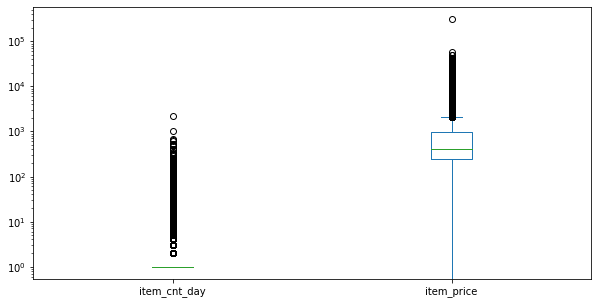

In [3]:
display(sales_train[["item_cnt_day","item_price"]].describe(percentiles=[0.001,0.01,0.990,0.999]).T);
fig, ax = plt.subplots(1,1,figsize=(10,5))
sales_train[["item_cnt_day","item_price"]].plot(kind="box",logy=True, ax=ax);

In [4]:
sales_train["item_cnt_day"] = sales_train["item_cnt_day"].clip(0,25)
sales_train["item_price"] = sales_train["item_price"].clip(0.1,25000)
sales_train["revenue"] = sales_train.item_cnt_day*sales_train.item_price

In [5]:
items

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


### Duplicated entities based on text representation

In [6]:
# categories
from itertools import product
from fuzzywuzzy import fuzz

cat_pairs = pd.DataFrame(list(product(shops.shop_id.unique(),shops.shop_id.unique())),
    columns=["from","to"])
cat_pairs = cat_pairs[cat_pairs["from"]<cat_pairs["to"]]
cat_pairs["tf"] = item_categories.item_category_name[cat_pairs["from"]].values
cat_pairs["tt"] = item_categories.item_category_name[cat_pairs["to"]].values
cat_pairs["similarity"] = cat_pairs.apply(lambda x: fuzz.ratio(x["tf"],x["tt"]), axis=1)
cat_pairs.sort_values("similarity").tail(10)

,from,to,tf,tt,similarity
124,2,4,Аксессуары - PS3,Аксессуары - PSP,94
123,2,3,Аксессуары - PS3,Аксессуары - PS4,94
184,3,4,Аксессуары - PS4,Аксессуары - PSP,94
63,1,3,Аксессуары - PS2,Аксессуары - PS4,94
673,11,13,Игровые консоли - PS3,Игровые консоли - PSP,95
733,12,13,Игровые консоли - PS4,Игровые консоли - PSP,95
613,10,13,Игровые консоли - PS2,Игровые консоли - PSP,95
672,11,12,Игровые консоли - PS3,Игровые консоли - PS4,95
611,10,11,Игровые консоли - PS2,Игровые консоли - PS3,95
612,10,12,Игровые консоли - PS2,Игровые консоли - PS4,95


In [7]:
# shops
shop_pairs = pd.DataFrame(list(product(shops.shop_id.unique(),shops.shop_id.unique())),
    columns=["from","to"])
shop_pairs = shop_pairs[shop_pairs["from"]<shop_pairs["to"]]
shop_pairs["tf"] = shops.shop_name[shop_pairs["from"]].values
shop_pairs["tt"] = shops.shop_name[shop_pairs["to"]].values
shop_pairs["similarity"] = shop_pairs.apply(lambda x: fuzz.ratio(x["tf"],x["tt"]), axis=1)
shop_pairs.sort_values("similarity").tail(10)

,from,to,tf,tt,similarity
3178,52,58,"Уфа ТК ""Центральный""","Якутск ТЦ ""Центральный""",74
885,14,45,"Казань ТЦ ""ПаркХаус"" II","Самара ТЦ ""ПаркХаус""",74
1648,27,28,"Москва ТЦ ""МЕГА Белая Дача II""","Москва ТЦ ""МЕГА Теплый Стан"" II",75
2334,38,54,"Омск ТЦ ""Мега""","Химки ТЦ ""Мега""",83
1831,30,31,"Москва ТЦ ""Перловский""","Москва ТЦ ""Семеновский""",84
57,0,57,"!Якутск Орджоникидзе, 56 фран","Якутск Орджоникидзе, 56",88
118,1,58,"!Якутск ТЦ ""Центральный"" фран","Якутск ТЦ ""Центральный""",88
2380,39,40,"РостовНаДону ТРК ""Мегацентр Горизонт""","РостовНаДону ТРК ""Мегацентр Горизонт"" Островной",88
1404,23,24,"Москва ТК ""Буденовский"" (пав.А2)","Москва ТК ""Буденовский"" (пав.К7)",94
611,10,11,Жуковский ул. Чкалова 39м?,Жуковский ул. Чкалова 39м²,96


In [8]:
# reduce duplicates
filter_pairs = shop_pairs[shop_pairs.similarity>80]
temp = sales_train.merge(filter_pairs, left_on="shop_id", right_on="to", how="left").loc[:,["from","shop_id"]]
sales_train["shop_id"] = temp["from"].combine_first(temp["shop_id"]).astype(int) #coalesce
temp = sales_test.merge(filter_pairs, left_on="shop_id", right_on="to", how="left").loc[:,["from","shop_id"]]
sales_test["shop_id"] = temp["from"].combine_first(temp["shop_id"]).astype(int)

In [9]:
# too slow :(
# item_pairs = items.merge(items, on="item_category_id", suffixes=["_from","_to"])
# item_pairs = item_pairs[item_pairs.item_name_from<item_pairs.item_name_to]
# item_pairs["similarity"] = item_pairs.apply(\
#     lambda x: fuzz.ratio(x["item_name_from"],x["item_name_to"]), axis=1)
# item_pairs.sort_values("similarity").tail(10)

In [10]:
# expand the dataset
shop_item_month = product(sales_train.shop_id.unique(), sales_train.item_id.unique(), sales_train.date_block_num.unique())
sales_index=pd.DataFrame(list(shop_item_month), columns=["shop_id","item_id","date_block_num"])

In [11]:
agg_sales_train = sales_train.groupby(["shop_id", "item_id", "date_block_num"], as_index=False).agg(
    total_sold=("item_cnt_day", sum), avg_price=("item_price",np.mean),
    sum_revenue=("revenue",sum), n_transactions = ("item_cnt_day",pd.Series.count)).sort_values("date_block_num")
agg_sales_train = sales_index.merge(agg_sales_train, on=["shop_id", "item_id", "date_block_num"], how="left").fillna(0)    
agg_sales_train.head()    

,shop_id,item_id,date_block_num,total_sold,avg_price,sum_revenue,n_transactions
0,59,22154,0,1.0,999.0,999.0,1.0
1,59,22154,1,0.0,0.0,0.0,0.0
2,59,22154,2,0.0,0.0,0.0,0.0
3,59,22154,3,0.0,0.0,0.0,0.0
4,59,22154,4,0.0,0.0,0.0,0.0


In [12]:
# target transformation
agg_sales_train["target"] = agg_sales_train["total_sold"].\
        groupby([agg_sales_train.shop_id,agg_sales_train.item_id]).shift(-1).\
            fillna(0).clip(0,20)

In [13]:
# lags on item-shop-month
lags = [1,2,3,6,12]
for l in lags:
    agg_sales_train["lag"+str(l)+"_total_sold"]=agg_sales_train["total_sold"].\
        groupby([agg_sales_train.shop_id,agg_sales_train.item_id]).\
            shift(l).fillna(0)

# rolling window
#win = [3,6]
#for w in win:
#    agg_sales_train["lag_win_"+str(w)]=agg_sales_train["cnt_item"].\
#        groupby([agg_sales_train.shop_id,agg_sales_train.item_id]).shift(1).rolling(w).mean()
#agg_sales_train.fillna(0, inplace=True)

# cumsum on item-shop-month
agg_sales_train["cumsum_total_sold"] = agg_sales_train["total_sold"].\
    groupby([agg_sales_train.shop_id,agg_sales_train.item_id]).cumsum()

# price change on item-shop-month
agg_sales_train["price_increase"]=(agg_sales_train["avg_price"]/\
    agg_sales_train["avg_price"].groupby([agg_sales_train.shop_id,agg_sales_train.item_id]).\
        shift(1)).fillna(1)#.clip(0,10)

In [14]:
# do the casting
fcols = agg_sales_train.select_dtypes("float").columns
icols = agg_sales_train.select_dtypes("integer").columns
agg_sales_train[fcols] = agg_sales_train[fcols].apply(pd.to_numeric, downcast="float")
agg_sales_train[icols] = agg_sales_train[icols].apply(pd.to_numeric, downcast="integer")
agg_sales_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39296214 entries, 0 to 39296213
Data columns (total 15 columns):
 #   Column             Dtype  
---  ------             -----  
 0   shop_id            int8   
 1   item_id            int16  
 2   date_block_num     int8   
 3   total_sold         float32
 4   avg_price          float32
 5   sum_revenue        float32
 6   n_transactions     float32
 7   target             float32
 8   lag1_total_sold    float32
 9   lag2_total_sold    float32
 10  lag3_total_sold    float32
 11  lag6_total_sold    float32
 12  lag12_total_sold   float32
 13  cumsum_total_sold  float32
 14  price_increase     float32
dtypes: float32(12), int16(1), int8(2)
memory usage: 2.2 GB


In [15]:
# item-month

In [16]:
# shop-month

In [17]:
# category-month

In [18]:
target = "target"
features = [c!=target for c in agg_sales_train.columns]

In [19]:
# fast tree bench
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
steps = range(1,31)
rsme_ls = []
for step in steps:
    last_block = agg_sales_train.date_block_num.max()-step
    train = agg_sales_train[agg_sales_train.date_block_num<last_block]
    test = agg_sales_train[agg_sales_train.date_block_num==last_block]
    gbm = CatBoostRegressor(iterations=100)
    #gbm = LGBMRegressor()
    gbm.fit(train.loc[:,features], train.loc[:,target], verbose=25)
    train_rsme = np.mean((gbm.predict(train.loc[:,features]).clip(0,20)-\
        train.loc[:,target])**2)**(1/2)
    test_rsme = np.mean((gbm.predict(test.loc[:,features]).clip(0,20)-\
        test.loc[:,target])**2)**(1/2)
    rsme_ls.append((last_block, train_rsme, test_rsme))   

Learning rate set to 0.5
0:	learn: 0.5675419	total: 3.97s	remaining: 6m 33s
25:	learn: 0.5081744	total: 42.1s	remaining: 1m 59s
50:	learn: 0.5042013	total: 1m 18s	remaining: 1m 15s
75:	learn: 0.5014798	total: 1m 55s	remaining: 36.6s
99:	learn: 0.4994204	total: 2m 31s	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5710906	total: 1.24s	remaining: 2m 3s
25:	learn: 0.5105847	total: 33.8s	remaining: 1m 36s
50:	learn: 0.5065461	total: 1m 6s	remaining: 1m 4s
75:	learn: 0.5035592	total: 1m 41s	remaining: 32s
99:	learn: 0.5016263	total: 2m 15s	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5760343	total: 1.33s	remaining: 2m 12s
25:	learn: 0.5144191	total: 35.3s	remaining: 1m 40s
50:	learn: 0.5100533	total: 1m 11s	remaining: 1m 8s
75:	learn: 0.5074583	total: 1m 47s	remaining: 33.9s
99:	learn: 0.5056054	total: 2m 25s	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5813865	total: 1.25s	remaining: 2m 3s
25:	learn: 0.5197130	total: 34.5s	remaining: 1m 38s
50:	learn: 0.5154180	total: 1m

Mean train RMSE: 0.5325802646464527
Std train RMSE: 0.017046410210293364
Mean test RMSE: 0.5058008611591686
Std test RMSE: 0.09666606469440181


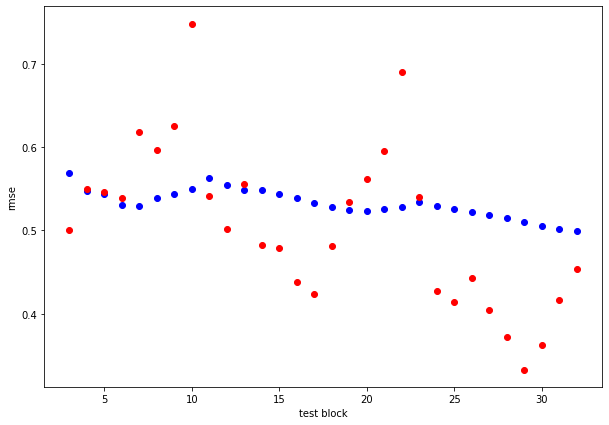

In [20]:
rmse_df = pd.DataFrame(rsme_ls, columns=["test_block", "train_rmse","test_rmse"])
print("Mean train RMSE: {}".format(rmse_df.train_rmse.mean()))
print("Std train RMSE: {}".format(rmse_df.train_rmse.std()))   
print("Mean test RMSE: {}".format(rmse_df.test_rmse.mean()))
print("Std test RMSE: {}".format(rmse_df.test_rmse.std()))   

fig, ax = plt.subplots(1,1,figsize=(10,7))
ax.scatter(x=rmse_df.test_block, y=rmse_df.train_rmse, c="blue");
ax.scatter(x=rmse_df.test_block, y=rmse_df.test_rmse, c="red");
ax.set_xlabel("test block");
ax.set_ylabel("rmse");

In [23]:
# fit unconstrained catboost
train = agg_sales_train[agg_sales_train.date_block_num<last_block]
test = agg_sales_train[agg_sales_train.date_block_num==last_block]
gbm = CatBoostRegressor()
gbm.fit(train.loc[:,features], train.loc[:,target], verbose=25)

# predict on test set
test_data = sales_test.merge(agg_sales_train[agg_sales_train.date_block_num==33],
    on=["shop_id", "item_id"], how="left").fillna(0)
test_features = [c not in [target, "ID"] for c in test_data.columns]
test_predictions = gbm.predict(test_data.loc[:,test_features]).clip(0,20)

Learning rate set to 0.148422
0:	learn: 0.7167926	total: 128ms	remaining: 2m 8s
25:	learn: 0.5907323	total: 3.4s	remaining: 2m 7s
50:	learn: 0.5858694	total: 6.62s	remaining: 2m 3s
75:	learn: 0.5827447	total: 9.79s	remaining: 1m 59s
100:	learn: 0.5804270	total: 13.1s	remaining: 1m 56s
125:	learn: 0.5781543	total: 16.5s	remaining: 1m 54s
150:	learn: 0.5764867	total: 19.6s	remaining: 1m 50s
175:	learn: 0.5748870	total: 22.8s	remaining: 1m 46s
200:	learn: 0.5737172	total: 26s	remaining: 1m 43s
225:	learn: 0.5725644	total: 29.2s	remaining: 1m 40s
250:	learn: 0.5714141	total: 32.4s	remaining: 1m 36s
275:	learn: 0.5701461	total: 35.8s	remaining: 1m 33s
300:	learn: 0.5693655	total: 38.9s	remaining: 1m 30s
325:	learn: 0.5683586	total: 42s	remaining: 1m 26s
350:	learn: 0.5673399	total: 45.4s	remaining: 1m 23s
375:	learn: 0.5666443	total: 48.6s	remaining: 1m 20s
400:	learn: 0.5659272	total: 51.9s	remaining: 1m 17s
425:	learn: 0.5649650	total: 55.2s	remaining: 1m 14s
450:	learn: 0.5643124	total: 

In [24]:
# submission, uncomment on new features
pd.concat([test_data.ID, pd.Series(test_predictions, name="item_cnt_month")], axis=1).\
    to_csv("../data/submissions/submission.csv", index=False)
!kaggle competitions submit -c competitive-data-science-predict-future-sales -f ../data/submissions/submission.csv -m "Try unconstrained catboost."

100%|██████████████████████████████████████| 5.08M/5.08M [00:02<00:00, 1.98MB/s]
Successfully submitted to Predict Future Sales

In [ ]:
# NOTE: consider item totals, moving averages and differencing